<a href="https://colab.research.google.com/github/m1ksu0/Pytorch-Testing/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:
# create a Model class that inherits nn.Module
class Model(nn.Module):
  # input layer (4 features of the flower) -->
  # Hidden layer1 (number of neurons) -->
  # H2(n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instigate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [14]:
# pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [18]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [20]:
# change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [23]:
# train test split! Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [24]:
# convert these to numpy arrays
X = X.values
y = y.values

In [25]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [30]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test  = torch.FloatTensor(X_test)

In [31]:
# Convert y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [32]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizee, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [33]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [41]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 500
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoh: {i} and loss: {loss}')

    # do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoh: 0 and loss: 0.1796349585056305
Epoh: 10 and loss: 0.1726853847503662
Epoh: 20 and loss: 0.16596916317939758
Epoh: 30 and loss: 0.1595316231250763
Epoh: 40 and loss: 0.15335874259471893
Epoh: 50 and loss: 0.147457554936409
Epoh: 60 and loss: 0.14180760085582733
Epoh: 70 and loss: 0.13642878830432892
Epoh: 80 and loss: 0.1312667429447174
Epoh: 90 and loss: 0.12634320557117462
Epoh: 100 and loss: 0.12165623158216476
Epoh: 110 and loss: 0.11719561368227005
Epoh: 120 and loss: 0.11295506358146667
Epoh: 130 and loss: 0.10893364250659943
Epoh: 140 and loss: 0.1051221713423729
Epoh: 150 and loss: 0.10150646418333054
Epoh: 160 and loss: 0.09807755798101425
Epoh: 170 and loss: 0.09482742100954056
Epoh: 180 and loss: 0.09174784272909164
Epoh: 190 and loss: 0.08883019536733627
Epoh: 200 and loss: 0.0860651507973671
Epoh: 210 and loss: 0.08344484120607376
Epoh: 220 and loss: 0.0809609666466713
Epoh: 230 and loss: 0.07860703766345978
Epoh: 240 and loss: 0.076376773416996
Epoh: 250 and loss: 0.

Text(0.5, 0, 'Epoch')

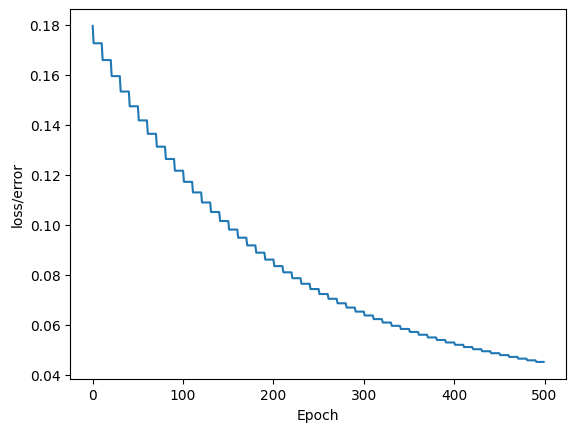

In [43]:
# graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")